In [3]:
import networkx as nx
import pandas as pd
import UserGraph
import importlib
importlib.reload(UserGraph)
import UserGraph

In [4]:
users = pd.read_csv('../userbase_builder/users.csv')
ts_connection = pd.read_csv('../userbase_builder/teacher_student_connections.csv')

In [5]:
ug = UserGraph.UserGraph()
ug.build_from_dataframe(users, ts_connection)

In [6]:
ug.save_to_file('graph.pkl')

In [7]:
users.iloc[0].to_dict()

{'user_id': 0,
 'is_professor': True,
 'is_student': False,
 'first_name': 'Florin',
 'last_name': 'Marinescu',
 'rating_avg': 3.5,
 'email': 'marinescu.florin36@gmail.com',
 'teaching_subject': 'Chemistry',
 'learning_subject': nan}

In [8]:
ug.add_user(1001, attributes = {'is_professor': True,
 'is_student': True,
 'first_name': 'Aca',
 'last_name': 'acA',
 'rating_avg_teacher': 4.8,
 'email': 'filip.simona16@gmail.com',
 'teaching_subject': 'Biology',
 'learning_subject': 'Mathematics'}
            )
ug.add_user(1002, attributes = {'is_professor': True,
 'is_student': True,
 'first_name': 'acA',
 'last_name': 'AcA',
 'rating_avg_teacher': 4.8,
 'email': 'filip.simona16@gmail.com',
 'teaching_subject': 'Mathematics',
 'learning_subject': 'Biology'}
            )

In [9]:
ug.cycles

[[514, 550, 9, 482, 453],
 [514, 550, 602, 482, 453],
 [514, 792, 495, 453],
 [514, 844, 55, 812, 453],
 [514, 921, 661, 807, 453],
 [514, 1001, 661, 807, 453],
 [517, 9, 342, 39, 969],
 [517, 9, 342, 768, 969],
 [517, 9, 363, 95, 969],
 [517, 9, 363, 136, 969],
 [517, 9, 363, 887, 251],
 [517, 9, 416, 118, 969],
 [517, 9, 416, 303, 969],
 [517, 9, 482, 38, 969],
 [517, 9, 482, 257, 969],
 [517, 9, 482, 667, 251],
 [517, 9, 670, 95, 969],
 [517, 9, 670, 136, 969],
 [517, 9, 670, 887, 251],
 [517, 9, 793, 792, 51],
 [517, 9, 793, 844, 969],
 [517, 9, 813, 792, 51],
 [517, 9, 813, 844, 969],
 [517, 9, 896, 386, 969],
 [517, 9, 998, 969],
 [517, 21, 118, 969],
 [517, 21, 303, 969],
 [517, 21, 824, 95, 969],
 [517, 21, 824, 136, 969],
 [517, 21, 824, 887, 251],
 [517, 132, 234, 386, 969],
 [517, 132, 381, 95, 969],
 [517, 132, 381, 136, 969],
 [517, 132, 381, 887, 251],
 [517, 132, 509, 95, 969],
 [517, 132, 509, 136, 969],
 [517, 132, 509, 887, 251],
 [517, 132, 550, 312, 77],
 [517, 132,

In [10]:
ug.find_best_cycle(1002)

[1001, 1002]

In [11]:
ug.find_best_cycle(1002)

[1001, 1002]

In [12]:
ug.draw_cycle(145)

<Figure size 1000x500 with 0 Axes>

In [13]:
ug.graph.get_edge_data(1001, 1002)

{0: {'subject': 'Biology', 'rating_avg_teacher': 4.8}}

In [14]:
# plt.figure(figsize=(20, 10))
# sG = G.subgraph(lst[0][0])
# #sG = []
# pos = nx.planar_layout(sG)
# nx.draw(sG, with_labels = True, pos = pos)
# edge_labels = {(u, v): f"Subject: {d['subject']}, Rating: {d['rating_avg_teacher']}"
#                for u, v, d in sG.edges(data=True)}

# nx.draw_networkx_edge_labels(sG, pos = pos, edge_labels=edge_labels,  connectionstyle = 'arc3,rad=0.1');

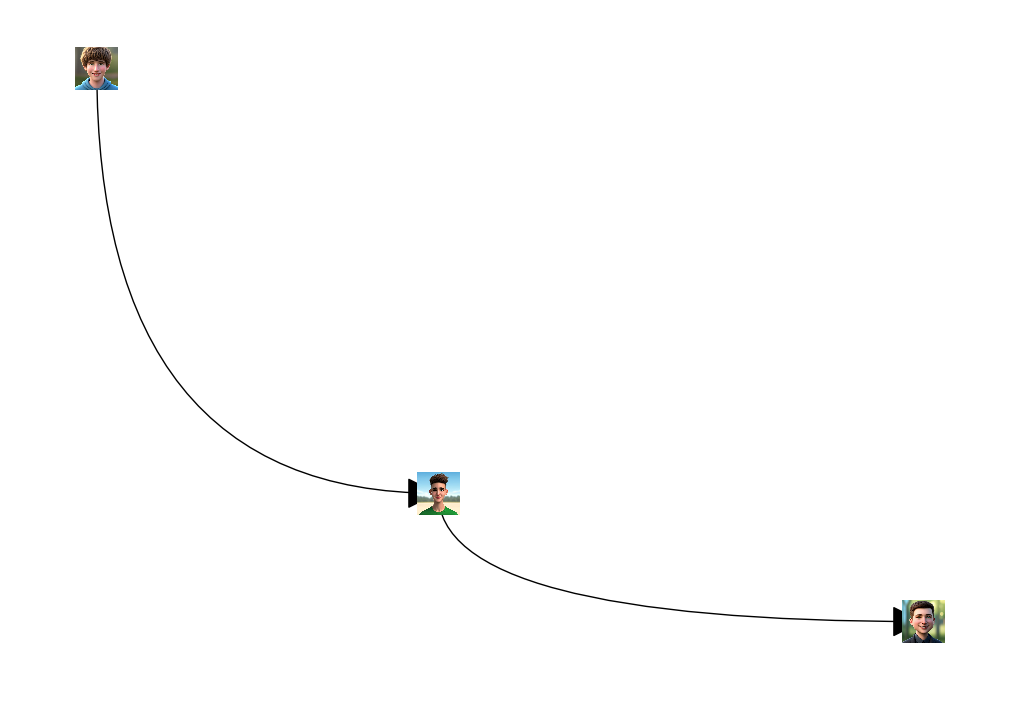

In [23]:
# SA ZAKRIVLJENIM GRANAMA

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

G = nx.DiGraph()
G.add_nodes_from([1, 2, 3])
G.add_edges_from([(1, 2), (2, 3)])

pos = nx.spring_layout(G)

images = {
    1: mpimg.imread('/Users/vladco/Downloads/avatari/HEIF Image 3.jpeg'),
    2: mpimg.imread('/Users/vladco/Downloads/avatari/HEIF Image 4.jpeg'),
    3: mpimg.imread('/Users/vladco/Downloads/avatari/HEIF Image 5.jpeg')
}

plt.figure(figsize=(10, 7))

nx.draw(
    G, pos, with_labels=False, node_size=0, edge_color='black',
    arrows=True, arrowsize=50, connectionstyle='angle3', 
)

ax = plt.gca()
for node, (x, y) in pos.items():
    img = images[node]
    imagebox = OffsetImage(img, zoom=0.03)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)

plt.show()

In [17]:
ug.graph.nodes(data=True)[1002]['teaching_subject']

'Mathematics'

/var/folders/07/s30sgs2s2cbf8h5g8krxzfth0000gn/T/ipykernel_41865/1369961362.py:51: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(
/var/folders/07/s30sgs2s2cbf8h5g8krxzfth0000gn/T/ipykernel_41865/1369961362.py:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  mask = mask.resize(img.size, Image.ANTIALIAS)


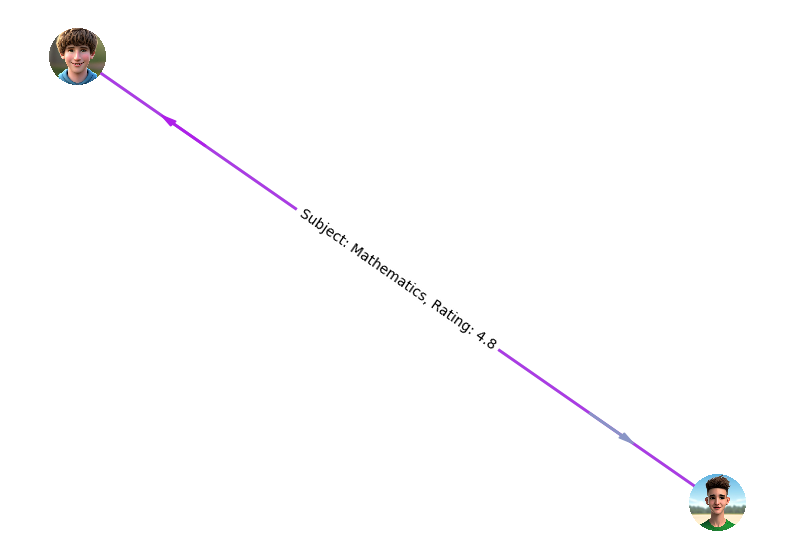

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches
from PIL import Image, ImageOps, ImageDraw
import numpy as np
import random

def make_circular_image(image_path):
    img = Image.open(image_path).convert("RGBA")
    size = min(img.size)
    mask = Image.new("L", img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0, size, size), fill=255)
    mask = mask.resize(img.size, Image.ANTIALIAS)
    circular_img = ImageOps.fit(img, (size, size), centering=(0.5, 0.5))
    circular_img.putalpha(mask)
    return circular_img

# Create a directed graph and add attributes for teaching subjects and edge data
# G = nx.DiGraph()
# G.add_nodes_from([
#     (1, {'teaching_subject': 'Math'}),
#     (2, {'teaching_subject': 'Science'}),
#     (3, {'teaching_subject': 'History'}),
# ])
# G.add_edges_from([
#     (1, 2, {'subject': 'Math to Science', 'rating_avg_teacher': 4.5}),
#     (2, 3, {'subject': 'Science to History', 'rating_avg_teacher': 4.8}),
# ])
G = nx.subgraph(ug.graph, [1001, 1002])
G = nx.DiGraph(G)


# Assign positions for the nodes
pos = nx.spring_layout(G)

# Map each unique teaching subject to a specific color
teaching_subjects = set(nx.get_node_attributes(G, 'teaching_subject').values())
color_map = {subject: f'#{random.randint(0, 0xFFFFFF):06x}' for subject in teaching_subjects}

# Increase the figure size to make space for visual elements
plt.figure(figsize=(10, 7))

# Draw edges with colors based on the teaching subject of the start node
for (start, end) in G.edges():
    start_subject = G.nodes[start]['teaching_subject']
    edge_color = color_map[start_subject]  # Use the start node's teaching subject for color

    nx.draw_networkx_edges(
        G, pos, edgelist=[(start, end)], arrows=False,
        connectionstyle='arc3,rad=0.3', edge_color=edge_color,
        alpha=0.8, width=2
    )

# Draw edge labels with information about the subject and rating
edge_labels = {(u, v): f"Subject: {d['subject']}, Rating: {d['rating_avg_teacher']}"
               for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', connectionstyle='arc3')

# Load circular images for each node (replace these with actual paths)
images = {
    1001: make_circular_image('/Users/vladco/Downloads/avatari/HEIF Image 3.jpeg'),
    1002: make_circular_image('/Users/vladco/Downloads/avatari/HEIF Image 4.jpeg'),
    3: make_circular_image('/Users/vladco/Downloads/avatari/HEIF Image 5.jpeg')
}

# Draw the circular images at the nodes' positions
ax = plt.gca()
for node, (x, y) in pos.items():
    img = np.array(images[node])
    imagebox = OffsetImage(img, zoom=0.04)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)

# Draw arrows manually at a custom location along the edges, matching the color of the edges
arrow_position = 0.8  # Adjust this value between 0 and 1
for (start, end) in G.edges():
    start_subject = G.nodes[start]['teaching_subject']
    arrow_color = color_map[start_subject]  # Use the start node's teaching subject for color

    x_start, y_start = pos[start]
    x_end, y_end = pos[end]

    arrow_x = x_start + arrow_position * (x_end - x_start)
    arrow_y = y_start + arrow_position * (y_end - y_start)

    arrow = patches.FancyArrow(
        arrow_x, arrow_y, (x_end - x_start) * 0.05, (y_end - y_start) * 0.05,
        width=0.005, head_width=0.025, head_length=0.05, color=arrow_color
    )
    ax.add_patch(arrow)

plt.axis('off')
plt.show()

In [20]:
nx.DiGraph(G)

/var/folders/07/s30sgs2s2cbf8h5g8krxzfth0000gn/T/ipykernel_41865/1539830899.py:55: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(
/var/folders/07/s30sgs2s2cbf8h5g8krxzfth0000gn/T/ipykernel_41865/1539830899.py:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  mask = mask.resize(img.size, Image.ANTIALIAS)


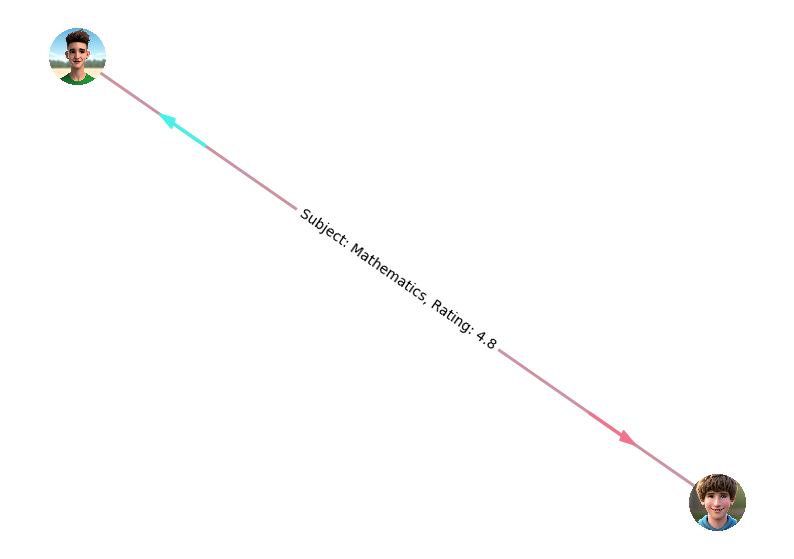

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches
from PIL import Image, ImageOps, ImageDraw
import numpy as np
import random

def make_circular_image(image_path):
    img = Image.open(image_path).convert("RGBA")
    size = min(img.size)
    mask = Image.new("L", img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0, size, size), fill=255)
    mask = mask.resize(img.size, Image.ANTIALIAS)
    circular_img = ImageOps.fit(img, (size, size), centering=(0.5, 0.5))
    circular_img.putalpha(mask)
    return circular_img

# Create a directed graph and add attributes for teaching subjects and edge data
# G = nx.DiGraph()
# G.add_nodes_from([
#     (1, {'teaching_subject': 'Math'}),
#     (2, {'teaching_subject': 'Science'}),
#     (3, {'teaching_subject': 'History'}),
# ])
# G.add_edges_from([
#     (1, 2, {'subject': 'Math to Science', 'rating_avg_teacher': 4.5}),
#     (2, 3, {'subject': 'Science to History', 'rating_avg_teacher': 4.8}),
#     (3, 1, {'subject': 'History to Math', 'rating_avg_teacher': 4.7})  # Added to create a cycle
# ])
G = nx.subgraph(ug.graph, [1001, 1002])
G = nx.DiGraph(G)

# Assign positions for the nodes
pos = nx.spring_layout(G)

# Map each unique teaching subject to a specific color
teaching_subjects = set(nx.get_node_attributes(G, 'teaching_subject').values())
color_map = {subject: f'#{random.randint(0, 0xFFFFFF):06x}' for subject in teaching_subjects}

# Increase the figure size to make space for visual elements
plt.figure(figsize=(10, 7))

# Draw edges with curved styles to handle overlapping
curvature_values = [-0.3, 0.3]  # Curvature values for different edges
for i, (start, end) in enumerate(G.edges()):
    start_subject = G.nodes[start]['teaching_subject']
    edge_color = color_map[start_subject]  # Use the start node's teaching subject for color

    # Use a different curvature for each edge, cycling through the curvature values
    curvature = curvature_values[i % len(curvature_values)]

    nx.draw_networkx_edges(
        G, pos, edgelist=[(start, end)], arrows=False,
        connectionstyle=f'arc3,rad={curvature}', edge_color=edge_color,
        alpha=0.8, width=2
    )

# Draw edge labels with information about the subject and rating
edge_labels = {(u, v): f"Subject: {d['subject']}, Rating: {d['rating_avg_teacher']}"
               for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')

# Load circular images for each node (replace these with actual paths)
images = {
    1001: make_circular_image('/Users/vladco/Downloads/avatari/HEIF Image 3.jpeg'),
    1002: make_circular_image('/Users/vladco/Downloads/avatari/HEIF Image 4.jpeg'),
    3: make_circular_image('/Users/vladco/Downloads/avatari/HEIF Image 5.jpeg')
}

# Draw the circular images at the nodes' positions
ax = plt.gca()
for node, (x, y) in pos.items():
    img = np.array(images[node])
    imagebox = OffsetImage(img, zoom=0.04)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)

# Draw arrows manually at a custom location along the edges, matching the color of the edges
arrow_position = 0.8  # Adjust this value between 0 and 1
for (start, end) in G.edges():
    start_subject = G.nodes[start]['teaching_subject']
    arrow_color = color_map[start_subject]  # Use the start node's teaching subject for color

    x_start, y_start = pos[start]
    x_end, y_end = pos[end]

    arrow_x = x_start + arrow_position * (x_end - x_start)
    arrow_y = y_start + arrow_position * (y_end - y_start)

    arrow = patches.FancyArrow(
        arrow_x, arrow_y, (x_end - x_start) * 0.05, (y_end - y_start) * 0.05,
        width=0.005, head_width=0.025, head_length=0.05, color=arrow_color
    )
    ax.add_patch(arrow)

plt.axis('off')
plt.show()